For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [ ]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date")

In [ ]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [ ]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [ ]:
df = df.drop(df[df.value > df.value.quantile(0.975)].index)
df = df.drop(df[df.value < df.value.quantile(0.025)].index)

In [ ]:
df.sample(5)

,value
date,
2018-08-24,62847
2018-07-04,63630
2019-09-17,116171
2018-05-24,72924
2019-12-01,142918


In [ ]:
df.index = pd.to_datetime(df.index)

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

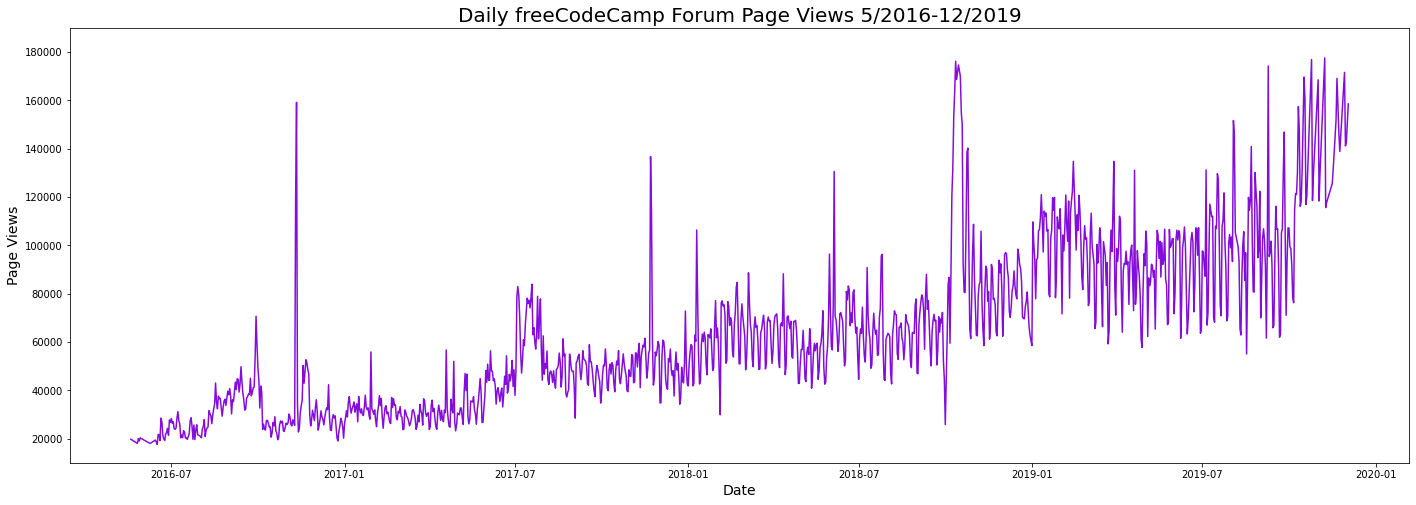

In [ ]:
plt.figure(figsize=(24, 8))
plt.plot(df.index, df.value, color="#850ddb")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Page Views", fontsize=14)
plt.ylim(10000, 190000)
plt.show()

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [ ]:
df_bar = df.copy()
df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month
df_bar = df_bar.groupby(['Year', 'Month']).value.mean()
df_bar = df_bar.unstack()

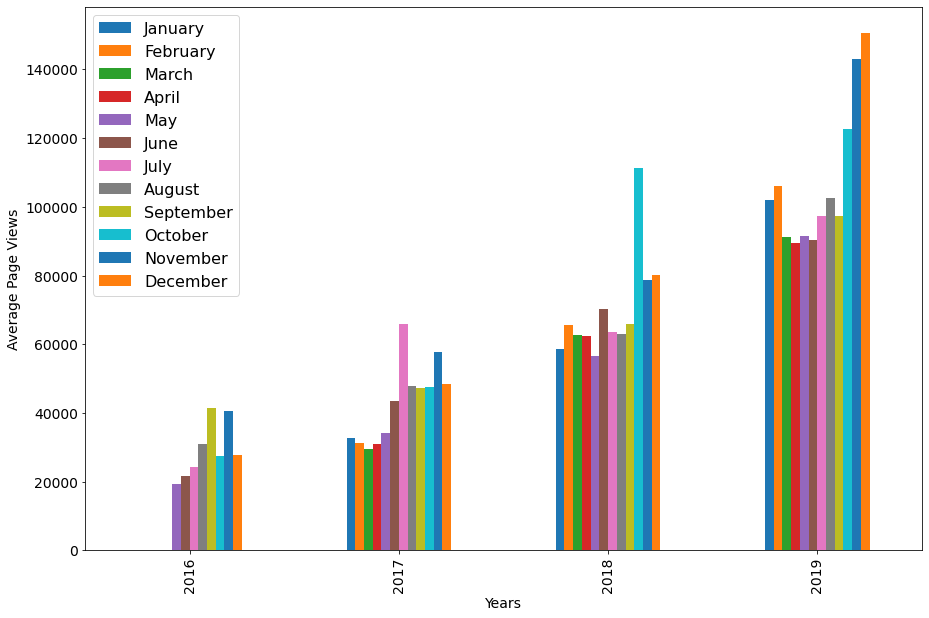

In [ ]:
month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July',
             'August', 'September', 'October', 'November', 'December']
fig = df_bar.plot(kind= 'bar', figsize = (15,10)).figure
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Average Page Views', fontsize=14)
plt.legend(fontsize=16, labels=month_names)
plt.show()

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

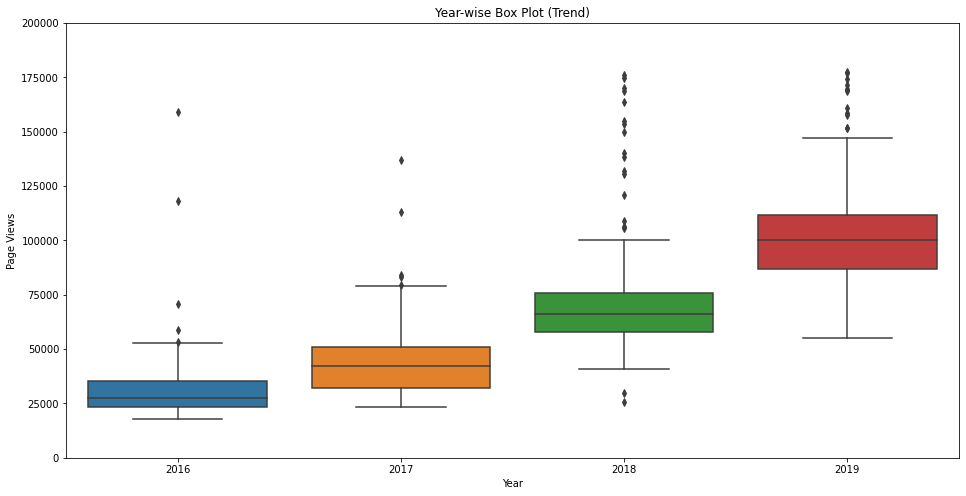

In [ ]:
plt.figure(figsize=(16, 8))
box = sns.boxplot(x=df.index.year, y=df.value)
plt.title("Year-wise Box Plot (Trend)")
plt.xlabel("Year")
plt.ylabel("Page Views")
plt.ylim(0, 200000)
plt.show()

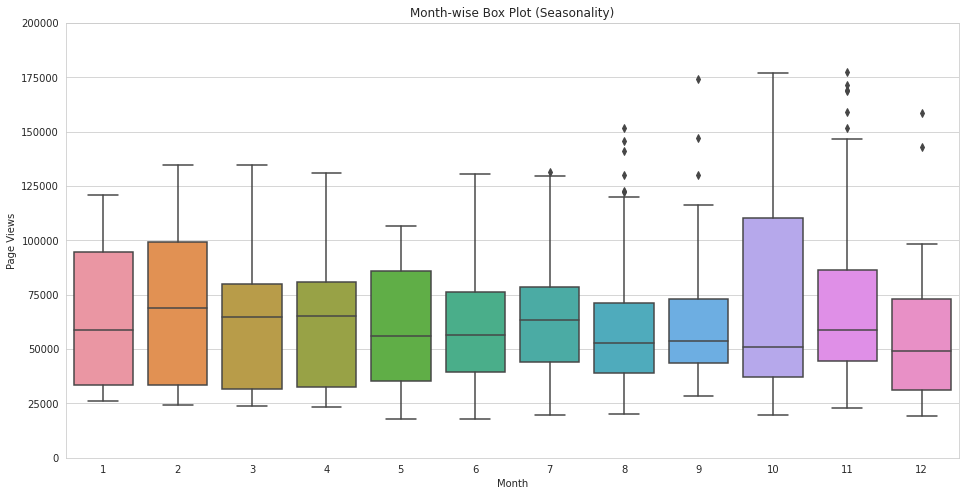

In [ ]:
plt.figure(figsize=(16, 8))
box = sns.boxplot(x=df.index.month, y=df.value)
plt.title("Month-wise Box Plot (Seasonality)")
plt.xticks(name=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Page Views")
plt.ylim(0, 200000)
plt.show()